<a href="https://colab.research.google.com/github/pkor725/world-happiness-report-hypothesis-testing/blob/master/Copy_of_Copy_of_Master_Week_5_Core_Group_Project_World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report

## Requirement
1. Find and deal with outliers, anomalies, and missing data within the dataset.

2. Plot appropriate univariate and bivariate summaries recording our observations.

3. Implement the solution by performing hypothesis testing.


## 1.0 Import Libraries and Data

In [0]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #For z test Calculation
from statsmodels.stats import weightstats as stests #For z test calculation
# import pandas_profiling as pp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
#Increase number of rows and columns displayed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
#Import data
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

## 2.0 Exploring the Data

### 2.1 Merging the Dataframes

In [0]:
#Checking that the columns are the same to merge the dataframes
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'], dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'], dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], dtype='object')
Index(['Overal

In [0]:
#Dropping unnecessary columns
df_2015.drop(columns=['Standard Error', 'Region', 'Dystopia Residual'], inplace=True)
df_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Region', 'Dystopia Residual'], inplace=True)
df_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], inplace=True)

In [0]:
#Changing the order of 2017 dataframe
df_2017 = df_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity']]

In [0]:
#Adding a column with the year of data collection
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

In [0]:
df_2015 = df_2015[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
df_2016 = df_2016[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
df_2017 = df_2017[['Happiness.Rank', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Generosity', 'Trust..Government.Corruption.', 'Year']]

In [0]:
df_2015.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
df_2016.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
df_2017.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']

In [0]:
#Checking the column names
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make lif

In [0]:
# Merging the data
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


### 2.1 Data Understanding

In [0]:
#Check sample data
df.sample(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
15,16,Belgium,6.927,1.324000,1.483000,0.894000,0.58300,0.18800,0.240000,2018
81,82,Croatia,5.321,1.115000,1.161000,0.737000,0.38000,0.12000,0.039000,2018
115,116,Sri Lanka,4.471,0.918000,1.314000,0.672000,0.58500,0.30700,0.050000,2018
111,112,Iraq,4.677,0.985490,0.818890,0.602370,0.00000,0.17922,0.137880,2015
79,80,Malaysia,5.339,1.221000,1.171000,0.828000,0.50800,0.26000,0.024000,2019
16,17,Luxembourg,6.946,1.563910,1.219630,0.918940,0.61583,0.28034,0.377980,2015
24,25,Mexico,6.578,1.153184,1.210862,0.709979,0.41273,0.12099,0.132774,2017
58,59,Bolivia,5.822,0.794220,0.837790,0.469700,0.50961,0.21698,0.077460,2016
61,62,Hungary,5.758,1.201000,1.410000,0.828000,0.19900,0.08100,0.020000,2019
52,53,Paraguay,5.878,0.759850,1.304770,0.660980,0.53899,0.34240,0.082420,2015


In [0]:
df.shape

(782, 10)

Dataset has 782 rows and 10 columns

In [0]:
#Explore the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
Overall rank                    782 non-null int64
Country or region               782 non-null object
Score                           782 non-null float64
GDP per capita                  782 non-null float64
Social support                  782 non-null float64
Healthy life expectancy         782 non-null float64
Freedom to make life choices    782 non-null float64
Generosity                      782 non-null float64
Perceptions of corruption       781 non-null float64
Year                            782 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


1 column is of string date type while rest are numeric.

In [0]:
#Check Null Columns
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

We will replace the null record in the dataset with a mean value.

In [0]:
#Replacing missing values with mean
df['Perceptions of corruption'].fillna((df['Perceptions of corruption'].mean()), inplace=True)

## 3.0 Exploratory Data Analysis

### 3.1 Distribution of Numerical Variables

Statistical Distribution

In [0]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105749,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054250,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091033,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.155861,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


Graphical Distribution

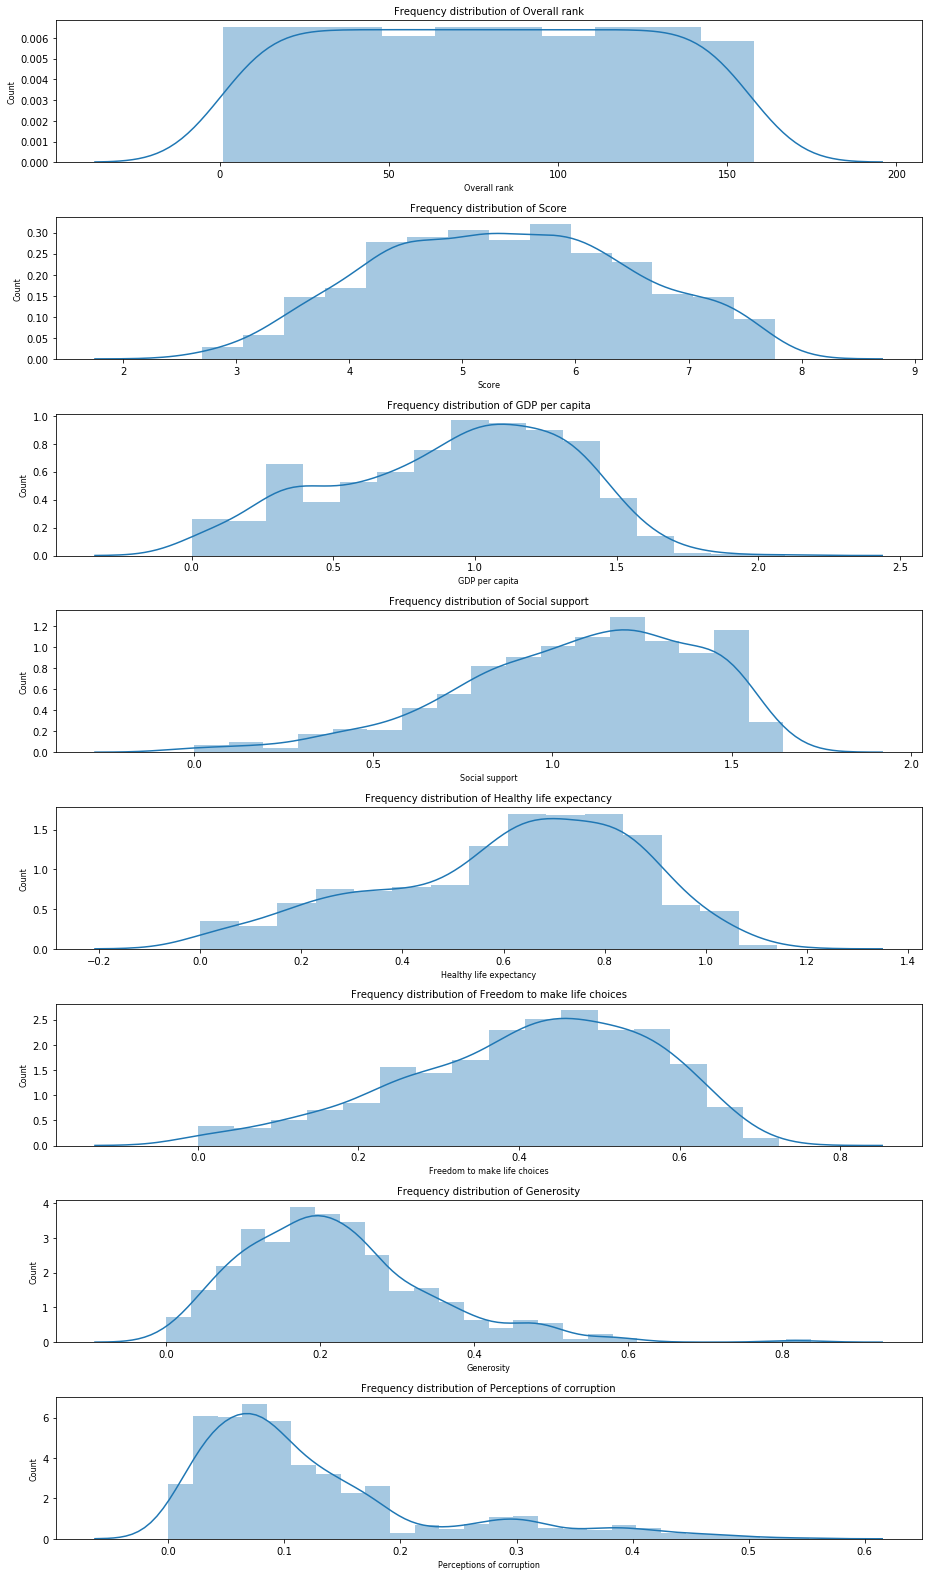

In [0]:
# Plotting distribution of numerical variables
col_names = ['Overall rank',  'Score', 'GDP per capita', 'Social support', 
            'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
            'Perceptions of corruption']
fig, ax = plt.subplots(len(col_names), figsize=(13,22))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.tight_layout()
plt.show()

Observations
1. Distribution of Sum of blue cars taken and return skewed to the left.

2. Cars hired throughtout the week with days 0 and 1 having a small records increase.

3. 3 distinct regions noted as the car hire destinations based on postal codes distributions

### 3.2 Distribution of Categorical variables

a) Day_Type

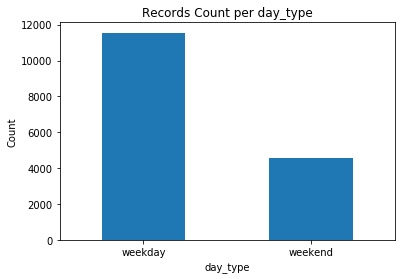

In [0]:
df_bc['day_type'].value_counts().plot.bar(rot =0)
plt.xlabel("day_type")
plt.ylabel("Count")
plt.title("Records Count per day_type")
plt.show()

Observation: Cummulatively from a simplistic perspective, there are more rides on week days. Expected as there are more weekdays than weekends.

b) Day of the week

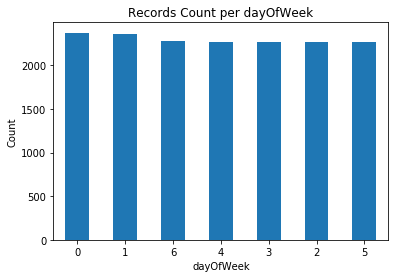

In [0]:
df_bc['dayOfWeek'].value_counts().plot.bar(rot =0)
plt.xlabel("dayOfWeek")
plt.ylabel("Count")
plt.title("Records Count per dayOfWeek")
plt.show()

Observation: Saturday and Sunday (days 0 and 1) have higher daily record counts

### 3.3 Checking outliers

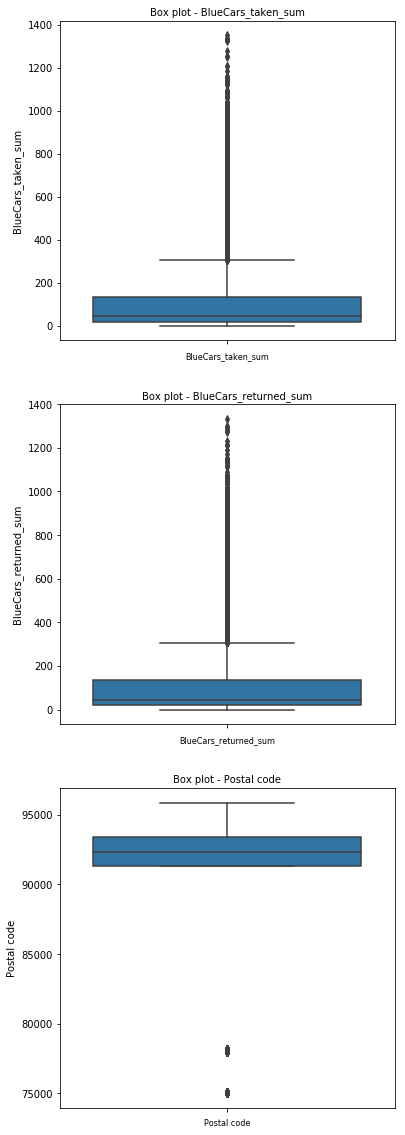

In [0]:
#Outlier: Year, household size and respondent age
col_names = ['BlueCars_taken_sum','BlueCars_returned_sum','Postal code']

fig, ax = plt.subplots(len(col_names), figsize=(6,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df_bc[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Observations: 

a) Regarding blue cars taken and returned, the outliers are valid data points hence cannot be ignored. 

b) Postal codes : Possibly different regions hence the differing postal codes
    

### 3.4 Bi-variate analysis

a) Blue cars taken versus blue cars returned

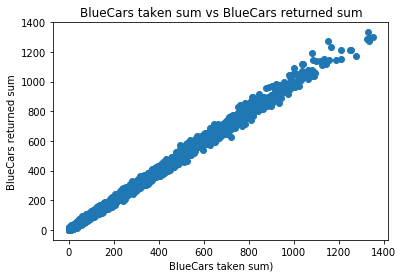

In [0]:
#Scatter plot will check for any correlation between age and household size
# Plotting  scatterplot
plt.scatter(df_bc['BlueCars_taken_sum'], df_bc['BlueCars_returned_sum'])

# Title
plt.title('BlueCars taken sum vs BlueCars returned sum')

# X axis label
plt.xlabel('BlueCars taken sum)')

# y axis label
plt.ylabel('BlueCars returned sum')

# Display scatterplot
plt.show()


Observation: There is a direct correlation between blue cars taken and blue cars returned

b) Blue cars taken versus day of the week

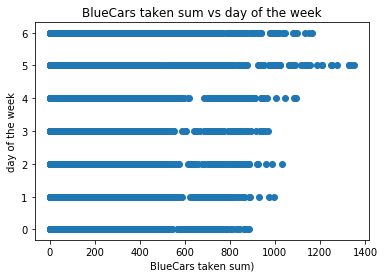

In [0]:
# Plotting  scatterplot
plt.scatter(df_bc['BlueCars_taken_sum'], df_bc['dayOfWeek'])

# Title
plt.title('BlueCars taken sum vs day of the week')

# X axis label
plt.xlabel('BlueCars taken sum)')

# y axis label
plt.ylabel('day of the week')

# Display scatterplot
plt.show()


Observation: Wednesday, Thursday and Friday have days where over 1000 cars are hired

c) Blue cars returned versus day of the week

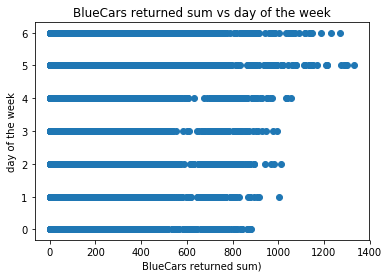

In [0]:
# Plotting  scatterplot
plt.scatter(df_bc['BlueCars_returned_sum'], df_bc['dayOfWeek'])

# Title
plt.title('BlueCars returned sum vs day of the week')

# X axis label
plt.xlabel('BlueCars returned sum)')

# y axis label
plt.ylabel('day of the week')

# Display scatterplot
plt.show()

Observations : There are instances where more cars over 1000 
    are returned on Thursday and Fridays

## Feature Engineering

Create new column strata. Each strata will represent an administrative region which is composed of postal codes

Rationale for this is to compare Paris CBD versus surburb of Seine-Saint-Denis as documented in data report.

In [0]:
#Unique Postal Codes
df_bc['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [0]:
#Procedure to assign strata based on postal code per region
def assign_strata():
# Create a list to store the data
    strata = []
    # For each row in the column,
    for postal_code in df_bc['Postal code']:
        if postal_code >= 75000 and postal_code <= 75999:
            strata.append(1)      
        elif postal_code >= 78000 and postal_code <= 78999:
            strata.append(2)
        elif postal_code >= 91000 and postal_code <= 91999:
            strata.append(3)
        elif postal_code >= 92000 and postal_code <= 92999:
            strata.append(4)
        elif postal_code >= 93000 and postal_code <= 93999:
            strata.append(5)
        elif postal_code >= 94000 and postal_code <= 94999:
            strata.append(6)    
        elif postal_code >= 95000 and postal_code <= 95999:
            strata.append(7)    
                             
    # Create a column from the list
    df_bc['strata'] = strata

In [0]:
# Execute strata
assign_strata()

In [0]:
#Observe strata column is created
df_bc.sample(5)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,strata
8844,92390,2018-05-08,1,weekday,16,22,4
1416,75010,2018-01-13,5,weekend,466,468,1
1717,75012,2018-01-02,1,weekday,406,412,1
3172,75112,2018-02-22,3,weekday,14,14,1
6863,92260,2018-01-03,2,weekday,24,28,4


## Sampling

a) Strata is Postal Code

In [0]:
df_bc['strata'].unique()

array([1, 2, 3, 4, 5, 6, 7])

b) Sampling approach

Stratified sampling to be applied where 10% of records will be selected from each strata i.e postal code

In [0]:
# Stratified sample
df_bc_strat = df_bc.groupby('strata', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.10))

# Counts per strata
df_output = df_bc_strat['strata'].value_counts().sort_values()
df_output[:]

7     47
3     47
2     47
6    265
5    300
1    343
4    560
Name: strata, dtype: int64

## Sampling Normality tests

a) Distribution per strata before sampling

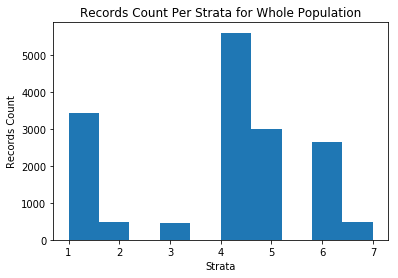

In [0]:
# histogram plot of whole population per strata
plt.hist(df_bc['strata'])
plt.xlabel("Strata")
plt.ylabel("Records Count")
plt.title("Records Count Per Strata for Whole Population")
plt.show()

b) Distribution per strata after sampling

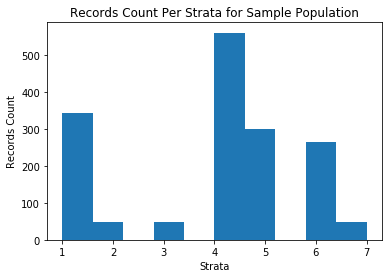

In [0]:
#Distribution post sampling
plt.hist(df_bc_strat['strata'])
plt.xlabel("Strata")
plt.ylabel("Records Count")
plt.title("Records Count Per Strata for Sample Population")
plt.show()

The distribution pattern before sampling and after sampling is similar hence sampling was well distributed across all strata.

#### Create dataframe the two regions with data for weekends only

#### Strata
75XXX - Paris - Strata 1
93XXX - Seine-Saint-Denis - Strata 5

i) Paris Sample

In [0]:
df_bc_sample_paris = df_bc_strat[ (df_bc_strat['strata']==1) & (df_bc_strat['day_type']=='weekend')]
df_bc_sample_paris = df_bc_sample_paris.copy()
df_bc_sample_paris.sample(5)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,strata
2153,75014,2018-05-20,6,weekend,422,381,1
527,75004,2018-03-04,6,weekend,191,191,1
2953,75019,2018-06-09,5,weekend,756,756,1
3167,75112,2018-02-17,5,weekend,13,13,1
2427,75016,2018-04-01,6,weekend,738,745,1


ii) Seine-Saint-Denis Sample

In [0]:
df_bc_sample_ssd = df_bc_strat[ (df_bc_strat['strata']==5) & (df_bc_strat['day_type']=='weekend')]
df_bc_sample_ssd = df_bc_sample_ssd.copy()
df_bc_sample_ssd.sample(5)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,strata
12898,93800,2018-04-01,6,weekend,24,15,5
12019,93390,2018-06-02,5,weekend,11,12,5
12402,93500,2018-03-04,6,weekend,57,58,5
11389,93310,2018-02-24,5,weekend,1,1,5
10453,93150,2018-01-20,5,weekend,9,6,5


In [0]:
df_bc_sample_ssd.describe()

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,strata
count,70.000000,70.000000,70.000000,70.000000,70.0
mean,93341.285714,5.442857,45.371429,44.628571,5.0
std,175.506897,0.500310,50.805732,50.659755,0.0
min,93100.000000,5.000000,0.000000,1.000000,5.0
25%,93230.000000,5.000000,9.250000,9.500000,5.0
50%,93310.000000,5.000000,27.000000,23.000000,5.0
75%,93400.000000,6.000000,57.750000,56.500000,5.0
max,93800.000000,6.000000,245.000000,231.000000,5.0


In [0]:
df_bc_sample_paris.describe()

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,strata
count,98.000000,98.000000,98.000000,98.000000,98.0
mean,75021.030612,5.479592,451.234694,453.173469,1.0
std,32.070301,0.502152,283.564019,283.856324,0.0
min,75001.000000,5.000000,9.000000,9.000000,1.0
25%,75006.000000,5.000000,249.500000,254.500000,1.0
50%,75012.000000,5.000000,417.000000,420.500000,1.0
75%,75018.000000,6.000000,648.000000,642.750000,1.0
max,75116.000000,6.000000,1186.000000,1142.000000,1.0


## Hypothesis Testing

#### a) Hypothesis

#### Null Hypothesis :
Average number of cars returned in Paris over weekends is same as those returned in Seine Saint Denis.

#### Alternative Hypothesis: 
Average number of cars returned in Paris over weekends is not the same as those returned in Seine Saint Denis.

Ho :  μ of Paris = μ of Seine Saint Denis

Ha :  μ of Paris ≠ μ of Seine Saint Denis

So, the test is for two independent samples similar to what is specified here http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTest-Means-Proportions/BS704_HypothesisTest-Means-Proportions6.html


#### b) Significance Level

Significance level of to validate the hypothesis above is 0.05 

#### c) Test Statistic

In [0]:
print("n1 = Paris: ",df_bc_sample_ssd.shape)
print("n2 = Seine-Saint-Denis",df_bc_sample_paris.shape)

n1 = Paris:  (70, 7)
n2 = Seine-Saint-Denis (98, 7)


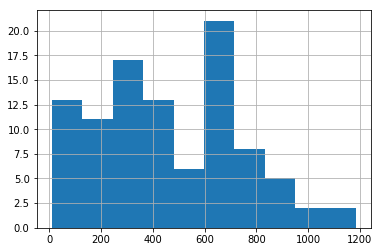

In [0]:
#Paris Distribution
df_bc_sample_paris['BlueCars_taken_sum'].hist()
plt.show()

Conclusion:

if n1 > 30 and n2 > 30
![image.png](attachment:image.png)

if n1 < 30 or n2 < 30
![image.png](attachment:image.png) where df =n1+n2-2.

Population is greater than 30 so Z statistic to be used

#### d) Z- score and P-Value Calculation

In [0]:
def calculate_zscore(sample1, sample2):
    ztest ,pval1 = stests.ztest(sample1, x2=sample2, value=0,alternative='two-sided')
    print(float(pval1))
    return (ztest ,pval1)
    
def hypothesis_eval(p_value,alpha):
  #P-value <= significance level (a) => Reject your null hypothesis in favor of your alternative hypothesis.  Your result is statistically significant.
  if p_value < alpha:
    result = "Reject the null hypothesis and conclude that the effect is statistically significant"
  else:
    #P-value > significance level (a) => Fail to reject your null hypothesis.  Your result is not statistically significant.
    result = "Fail to reject the null hypothesis"
  return result

def initialize_variables():
  HoP = 'mu for Paris is equal to Seine-Saint-Denis'
  HaP = 'mu for Paris is not equal to Seine-Saint-Denis'
  paris_bar = get_mean(df_bc_sample_paris['BlueCars_taken_sum']) # Paris Mean
  ssd_bar = get_mean(df_bc_sample_ssd['BlueCars_taken_sum']) # SSD Mean 
  paris_n =df_bc_sample_paris.shape[0]   #n1                          
  ssd_n =df_bc_sample_ssd.shape[0]  #n2
  paris_sigma = np.std(df_bc_sample_paris['BlueCars_taken_sum']) #Standard Deviation of paris
  ssd_sigma = np.std(df_bc_sample_ssd['BlueCars_taken_sum']) #Standard Deviation of ssd
  pop_sigma = 0
  alpha = 0.05
  return (HoP,HaP,paris_bar,ssd_bar, paris_n,ssd_n,paris_sigma,ssd_sigma,alpha)
  
#Function to calculate all
def calculate_all():
  HoP,HaP, x1bar,x2bar, paris_n,ssd_n,paris_sigma,ssd_sigma,alpha = initialize_variables()
  z_score , p_value = calculate_zscore(df_bc_sample_paris['BlueCars_taken_sum']
                                      ,df_bc_sample_ssd['BlueCars_taken_sum'])
  print("Z score" , z_score, " P value ", p_value )
  result = hypothesis_eval(p_value,alpha)
  print("Hypothesis: Null: ",HoP)
  print("Alternate:",HaP, ' Alpha ',alpha)
  print("Significance Level / Alpha is ",alpha)
  print("Paris Mean: ",x1bar, " SSD Mean :",x2bar )
  print('x_bar ', x1bar,  'ssd_n',ssd_n,'paris_sigma ',paris_sigma,' ssd_sigma ',ssd_sigma)
  print("Z score is", z_score,"P value is", p_value)
  print(result)

calculate_all()

2.7166660130853144e-32
Z score 11.830454560103707  P value  2.7166660130853144e-32
Hypothesis: Null:  mu for Paris is equal to Seine-Saint-Denis
Alternate: mu for Paris is not equal to Seine-Saint-Denis  Alpha  0.05
Significance Level / Alpha is  0.05
Paris Mean:  451  SSD Mean : 45
x_bar  451 ssd_n 70 paris_sigma  282.1135536688761  ssd_sigma  50.44152808056116
Z score is 11.830454560103707 P value is 2.7166660130853144e-32
Reject the null hypothesis and conclude that the effect is statistically significant


Above calculation has Z score being too high which is likely to result to erroneous conclusion.
The z score is high because of outliers. Therebeing, will drop the outliers then re-calculate.

### Dropping outliers

a) Paris Dataset

In [0]:
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [0]:
#Sample with no outliers
df_out = remove_outlier(df_bc_strat,'BlueCars_taken_sum')
#SSD sample
df_out_out_ssd = df_out[ (df_out['strata']==5) & (df_out['day_type']=='weekend')]
df_out_out_ssd = df_out_out_ssd.copy()
#Paris Sample
df_out_out_paris = df_out[ (df_out['strata']==1) & (df_out['day_type']=='weekend')]
df_out_out_paris = df_out_out_paris.copy()

In [0]:
df_bc_sample_ssd.shape

(70, 7)

In [0]:
#Calculate z score and pvalue
def initialize_variables():
  HoP = 'mu for Paris is equal to Seine-Saint-Denis'
  HaP = 'mu for Paris is not equal to Seine-Saint-Denis'
  paris_bar = get_mean(df_bc_sample_paris['BlueCars_taken_sum']) # Paris Mean
  ssd_bar = get_mean(df_bc_sample_ssd['BlueCars_taken_sum']) # SSD Mean 
  paris_n =df_out_out_ssd.shape[0]   #n1                          
  ssd_n =df_out_out_paris.shape[0]  #n2
  paris_sigma = np.std(df_out_out_ssd['BlueCars_taken_sum']) #Standard Deviation of paris
  ssd_sigma = np.std(df_out_out_paris['BlueCars_taken_sum']) #Standard Deviation of ssd
  pop_sigma = 0
  alpha = 0.05
  return (HoP,HaP,paris_bar,ssd_bar, paris_n,ssd_n,paris_sigma,ssd_sigma,alpha)
  
#Function to calculate all
def calculate_all():
  HoP,HaP, x1bar,x2bar, paris_n,ssd_n,paris_sigma,ssd_sigma,alpha = initialize_variables()
  z_score , p_value = calculate_zscore(df_out_out_ssd['BlueCars_taken_sum']
                                      ,df_out_out_paris['BlueCars_taken_sum'])
  print("Z score" , z_score, " P value ", p_value )
  result = hypothesis_eval(p_value,alpha)
  print("Hypothesis: Null: ",HoP)
  print("Alternate:",HaP, ' Alpha ',alpha)
  print("Significance Level / Alpha is ",alpha)
  print("Paris Mean: ",x1bar, " SSD Mean :",x2bar )
  print('x_bar ', x1bar,  'ssd_n',ssd_n,'paris_sigma ',paris_sigma,' ssd_sigma ',ssd_sigma)
  print("Z score is", z_score,"P value is", p_value)
  print(result)

calculate_all()

1.527956353696186e-11
Z score -6.745219706749452  P value  1.527956353696186e-11
Hypothesis: Null:  mu for Paris is equal to Seine-Saint-Denis
Alternate: mu for Paris is not equal to Seine-Saint-Denis  Alpha  0.05
Significance Level / Alpha is  0.05
Paris Mean:  451  SSD Mean : 45
x_bar  451 ssd_n 35 paris_sigma  50.44152808056116  ssd_sigma  114.60798846680873
Z score is -6.745219706749452 P value is 1.527956353696186e-11
Reject the null hypothesis and conclude that the effect is statistically significant


## Summary

Outcome: The Null that mean of paris is same as mean of Seine-Saint-Denis is rejected with a P-Value of 1.527956353696186e-11.

The average daily returned cars in Paris is 465 against that of Seine-Saint-Denisof 41.

Notably, this is after dropping of outliers. The outliers were dropped as data was not normally distributed which causes failure in usage of z test. It's proposed a further test mechanism is explored which includes the outliers. Dropping of may result to Type 1 error.
